In [ ]:
# pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots as plt

import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [ ]:
from sklearn.tree import (DecisionTreeClassifier as DTC, # import for classification
                          DecisionTreeRegressor as DTR, # for Regression
                          plot_tree, # to visulize tree
                          export_text) # to get text formate

from sklearn.ensemble import (GradientBoostingRegressor as GBR,# for boosting regressor
                              RandomForestRegressor as RFR)# for random forest regressor

from sklearn.metrics import (accuracy_score, # for calculating accuracy
                             log_loss) # for calculate loss

## Load Dataset

In [ ]:
data = load_data('Carseats')
data.columns, data.shape

(Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
        'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
       dtype='object'),
 (400, 11))

In [ ]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
data['Sales'].mean()

7.496325000000001

In [ ]:
High = np.where(data.Sales > 7.5, 'Yes' , 'NO') # interperate mean to convert data into yes / no for classification
High

array(['Yes', 'Yes', 'Yes', 'NO', 'NO', 'Yes', 'NO', 'Yes', 'NO', 'NO',
       'Yes', 'Yes', 'NO', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'NO', 'Yes', 'NO', 'NO', 'Yes', 'Yes', 'Yes', 'NO', 'NO',
       'Yes', 'Yes', 'Yes', 'NO', 'Yes', 'NO', 'Yes', 'Yes', 'NO', 'NO',
       'NO', 'NO', 'Yes', 'Yes', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO',
       'Yes', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO',
       'NO', 'Yes', 'NO', 'NO', 'Yes', 'Yes', 'NO', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'NO', 'NO', 'Yes', 'NO', 'Yes', 'Yes', 'Yes', 'NO',
       'Yes', 'Yes', 'Yes', 'Yes', 'NO', 'NO', 'Yes', 'Yes', 'Yes', 'NO',
       'Yes', 'NO', 'NO', 'NO', 'Yes', 'Yes', 'NO', 'Yes', 'NO', 'Yes',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'Yes', 'NO', 'Yes',
       'Yes', 'NO', 'NO', 'NO', 'Yes', 'Yes', 'NO', 'Yes', 'Yes', 'NO',
       'NO', 'Yes', 'NO', 'Yes', 'Yes', 'Yes', 'Yes', 'NO', 'NO', 'NO',
       'Yes', 'NO', 'Yes', 'Yes', 'NO', 'NO', 'NO', 'NO', 'Yes'

In [ ]:
data_model = MS(data.columns.drop('Sales') , intercept=False) # what is the work of intercept?
X = data_model.fit_transform(data)
feature_names = list(X.columns)
X = np.asarray(X) # decision trees run without upper column text fast
X


array([[138.,  73.,  11., ...,  17.,   1.,   1.],
       [111.,  48.,  16., ...,  10.,   1.,   1.],
       [113.,  35.,  10., ...,  12.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,  18.,   1.,   1.],
       [100.,  79.,   7., ...,  12.,   1.,   1.],
       [134.,  37.,   0., ...,  16.,   1.,   1.]])

In [ ]:
feature_names

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc[Good]',
 'ShelveLoc[Medium]',
 'Age',
 'Education',
 'Urban[Yes]',
 'US[Yes]']

## Classification Decision Trees

In [ ]:
model_cdt = DTC(criterion='entropy',# entropy or ginnie index  2 criteria studied
                max_depth=6, random_state=14) # max depth of the tree

model_cdt.fit(X,High) # we modified y as yes/no
pred = model_cdt.predict(X) # don't want to do like this first split data
accuracy_score(High,pred)

0.88

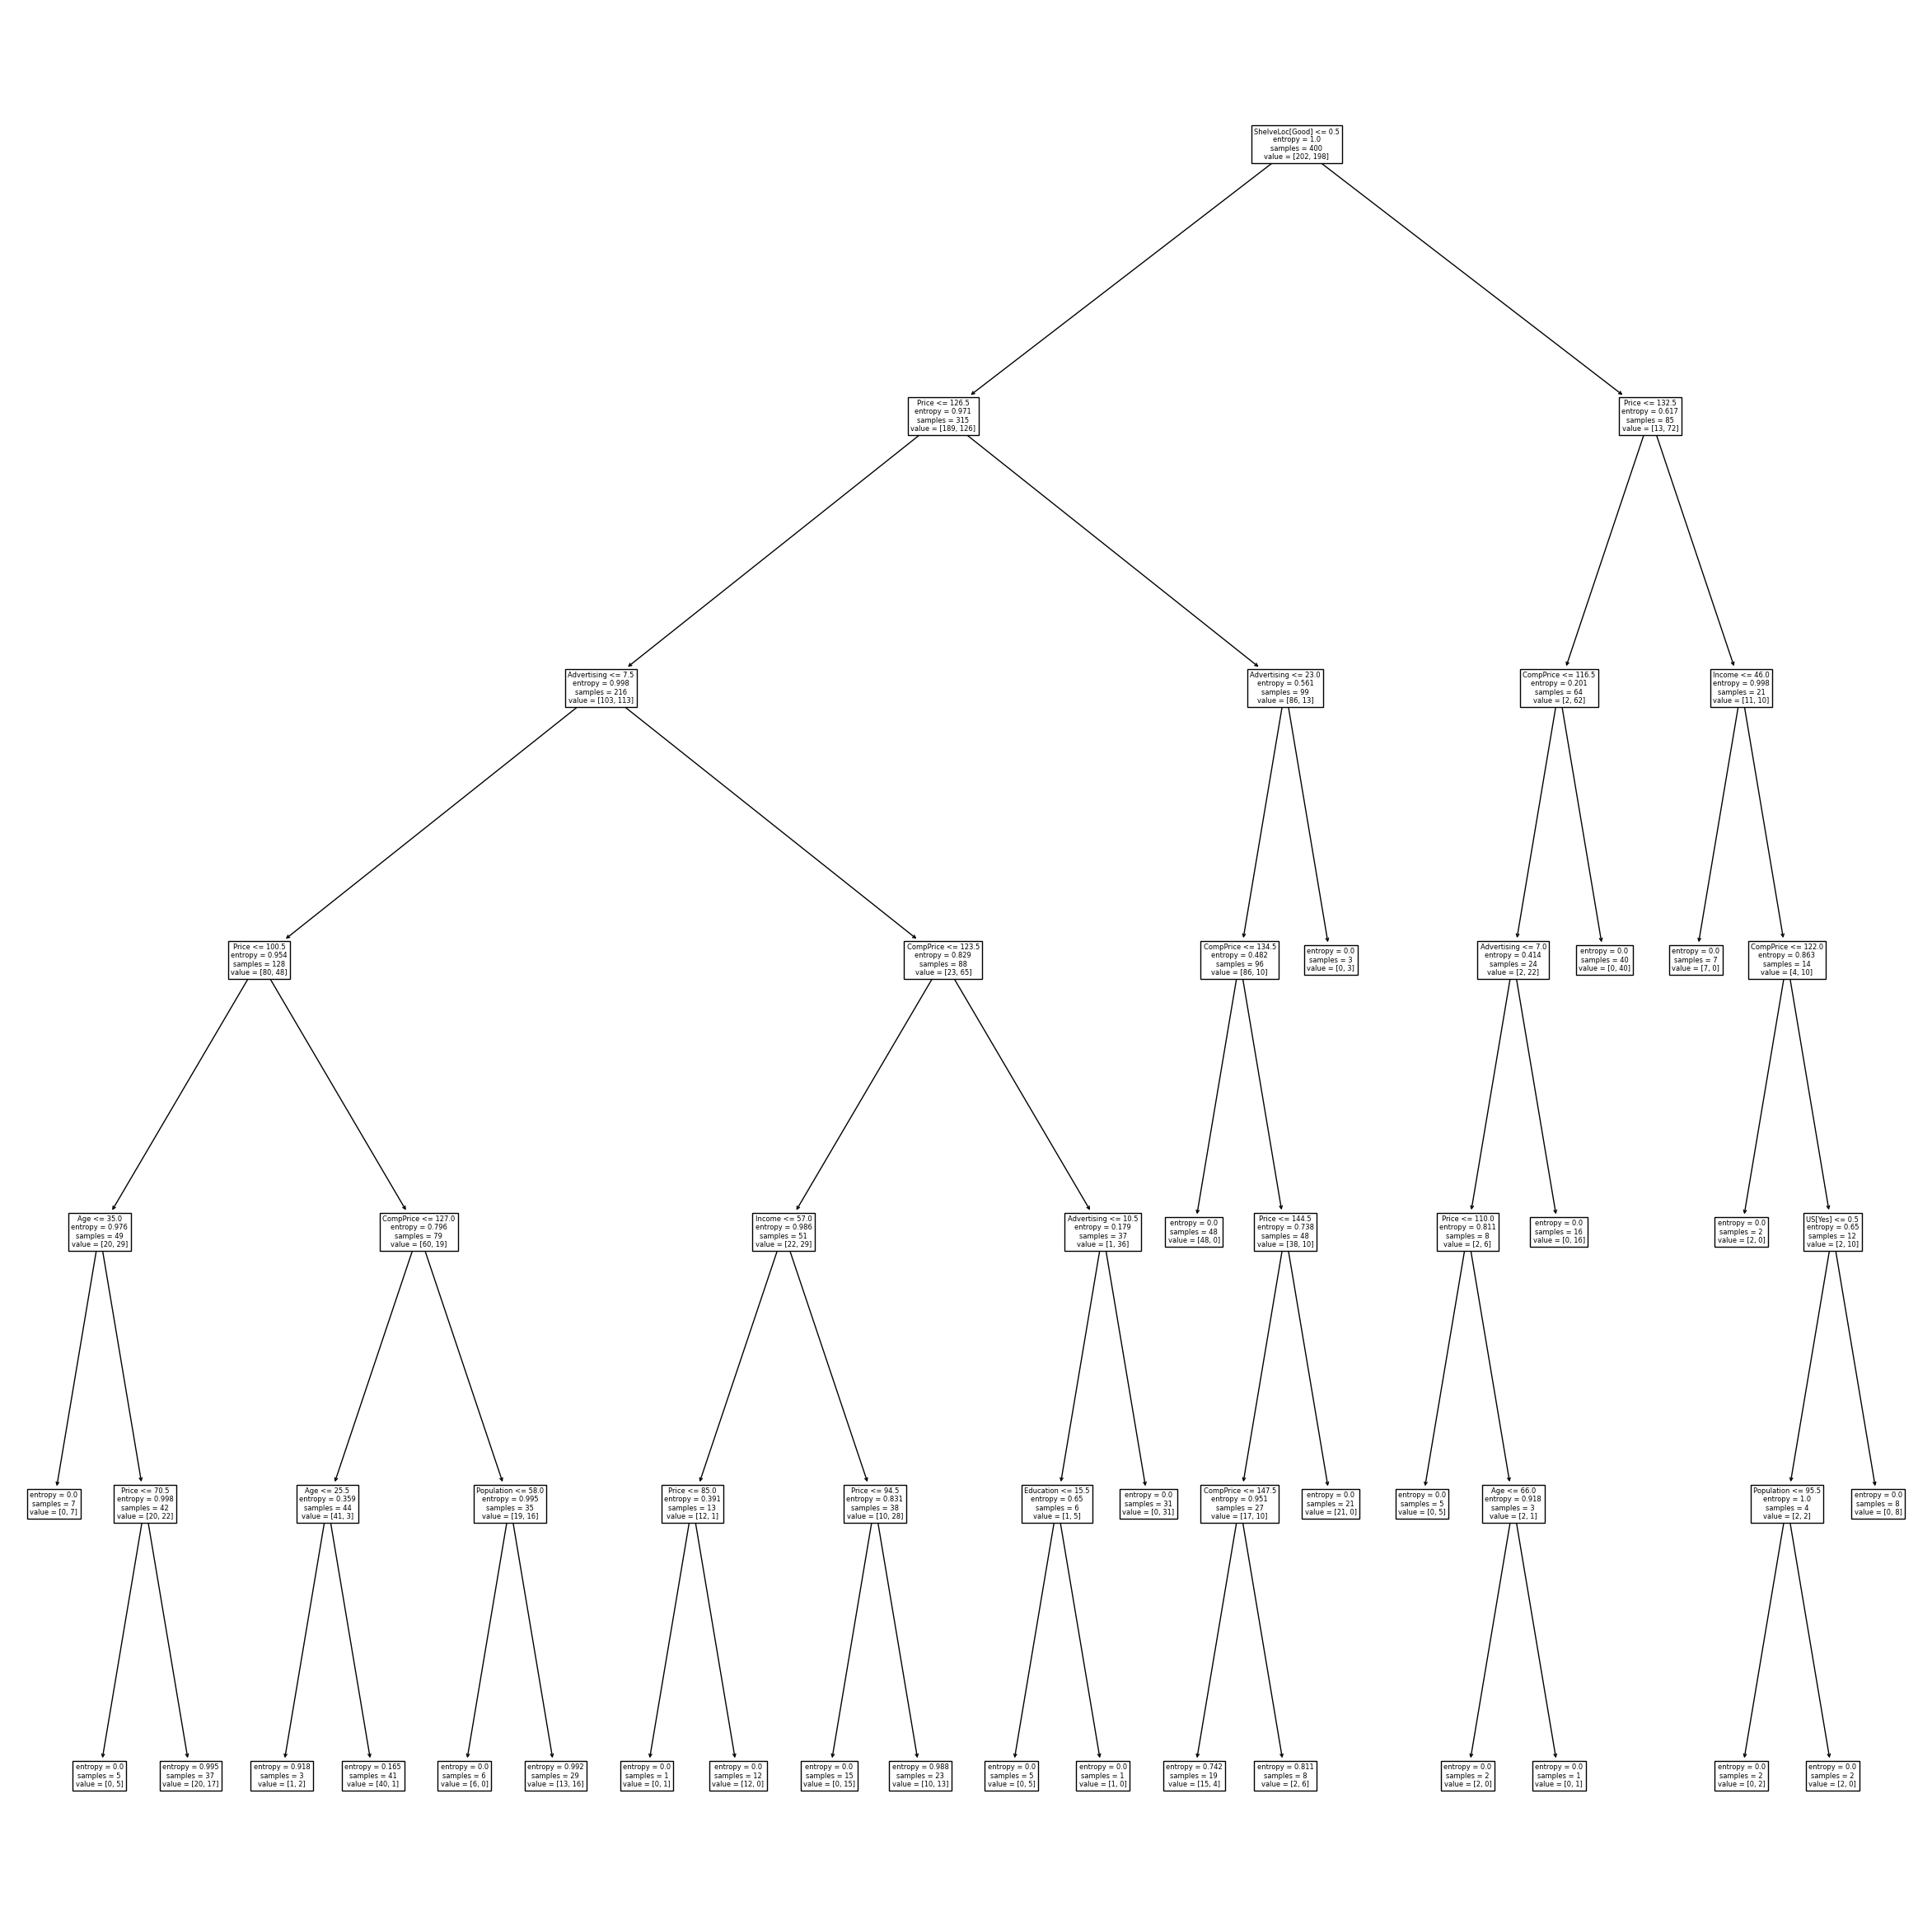

In [ ]:
#visulization # if depth is high this is cost heavy process
ax = plt(figsize=(30,30))[1]
plot_tree(model_cdt, feature_names=feature_names , ax=ax);

In [ ]:
X_train, X_test, y_train, y_test = skm.train_test_split(
    X,High , test_size = 0.3 , random_state=14
)

In [ ]:
model_cdt2 = DTC(criterion='entropy',# entropy or ginnie index  2 criteria studied
                 random_state=14) # max depth of the tree
model_cdt2.fit(X_train, y_train)
pred2 = model_cdt2.predict(X_test)
accuracy_score(y_test,pred2)

0.8666666666666667

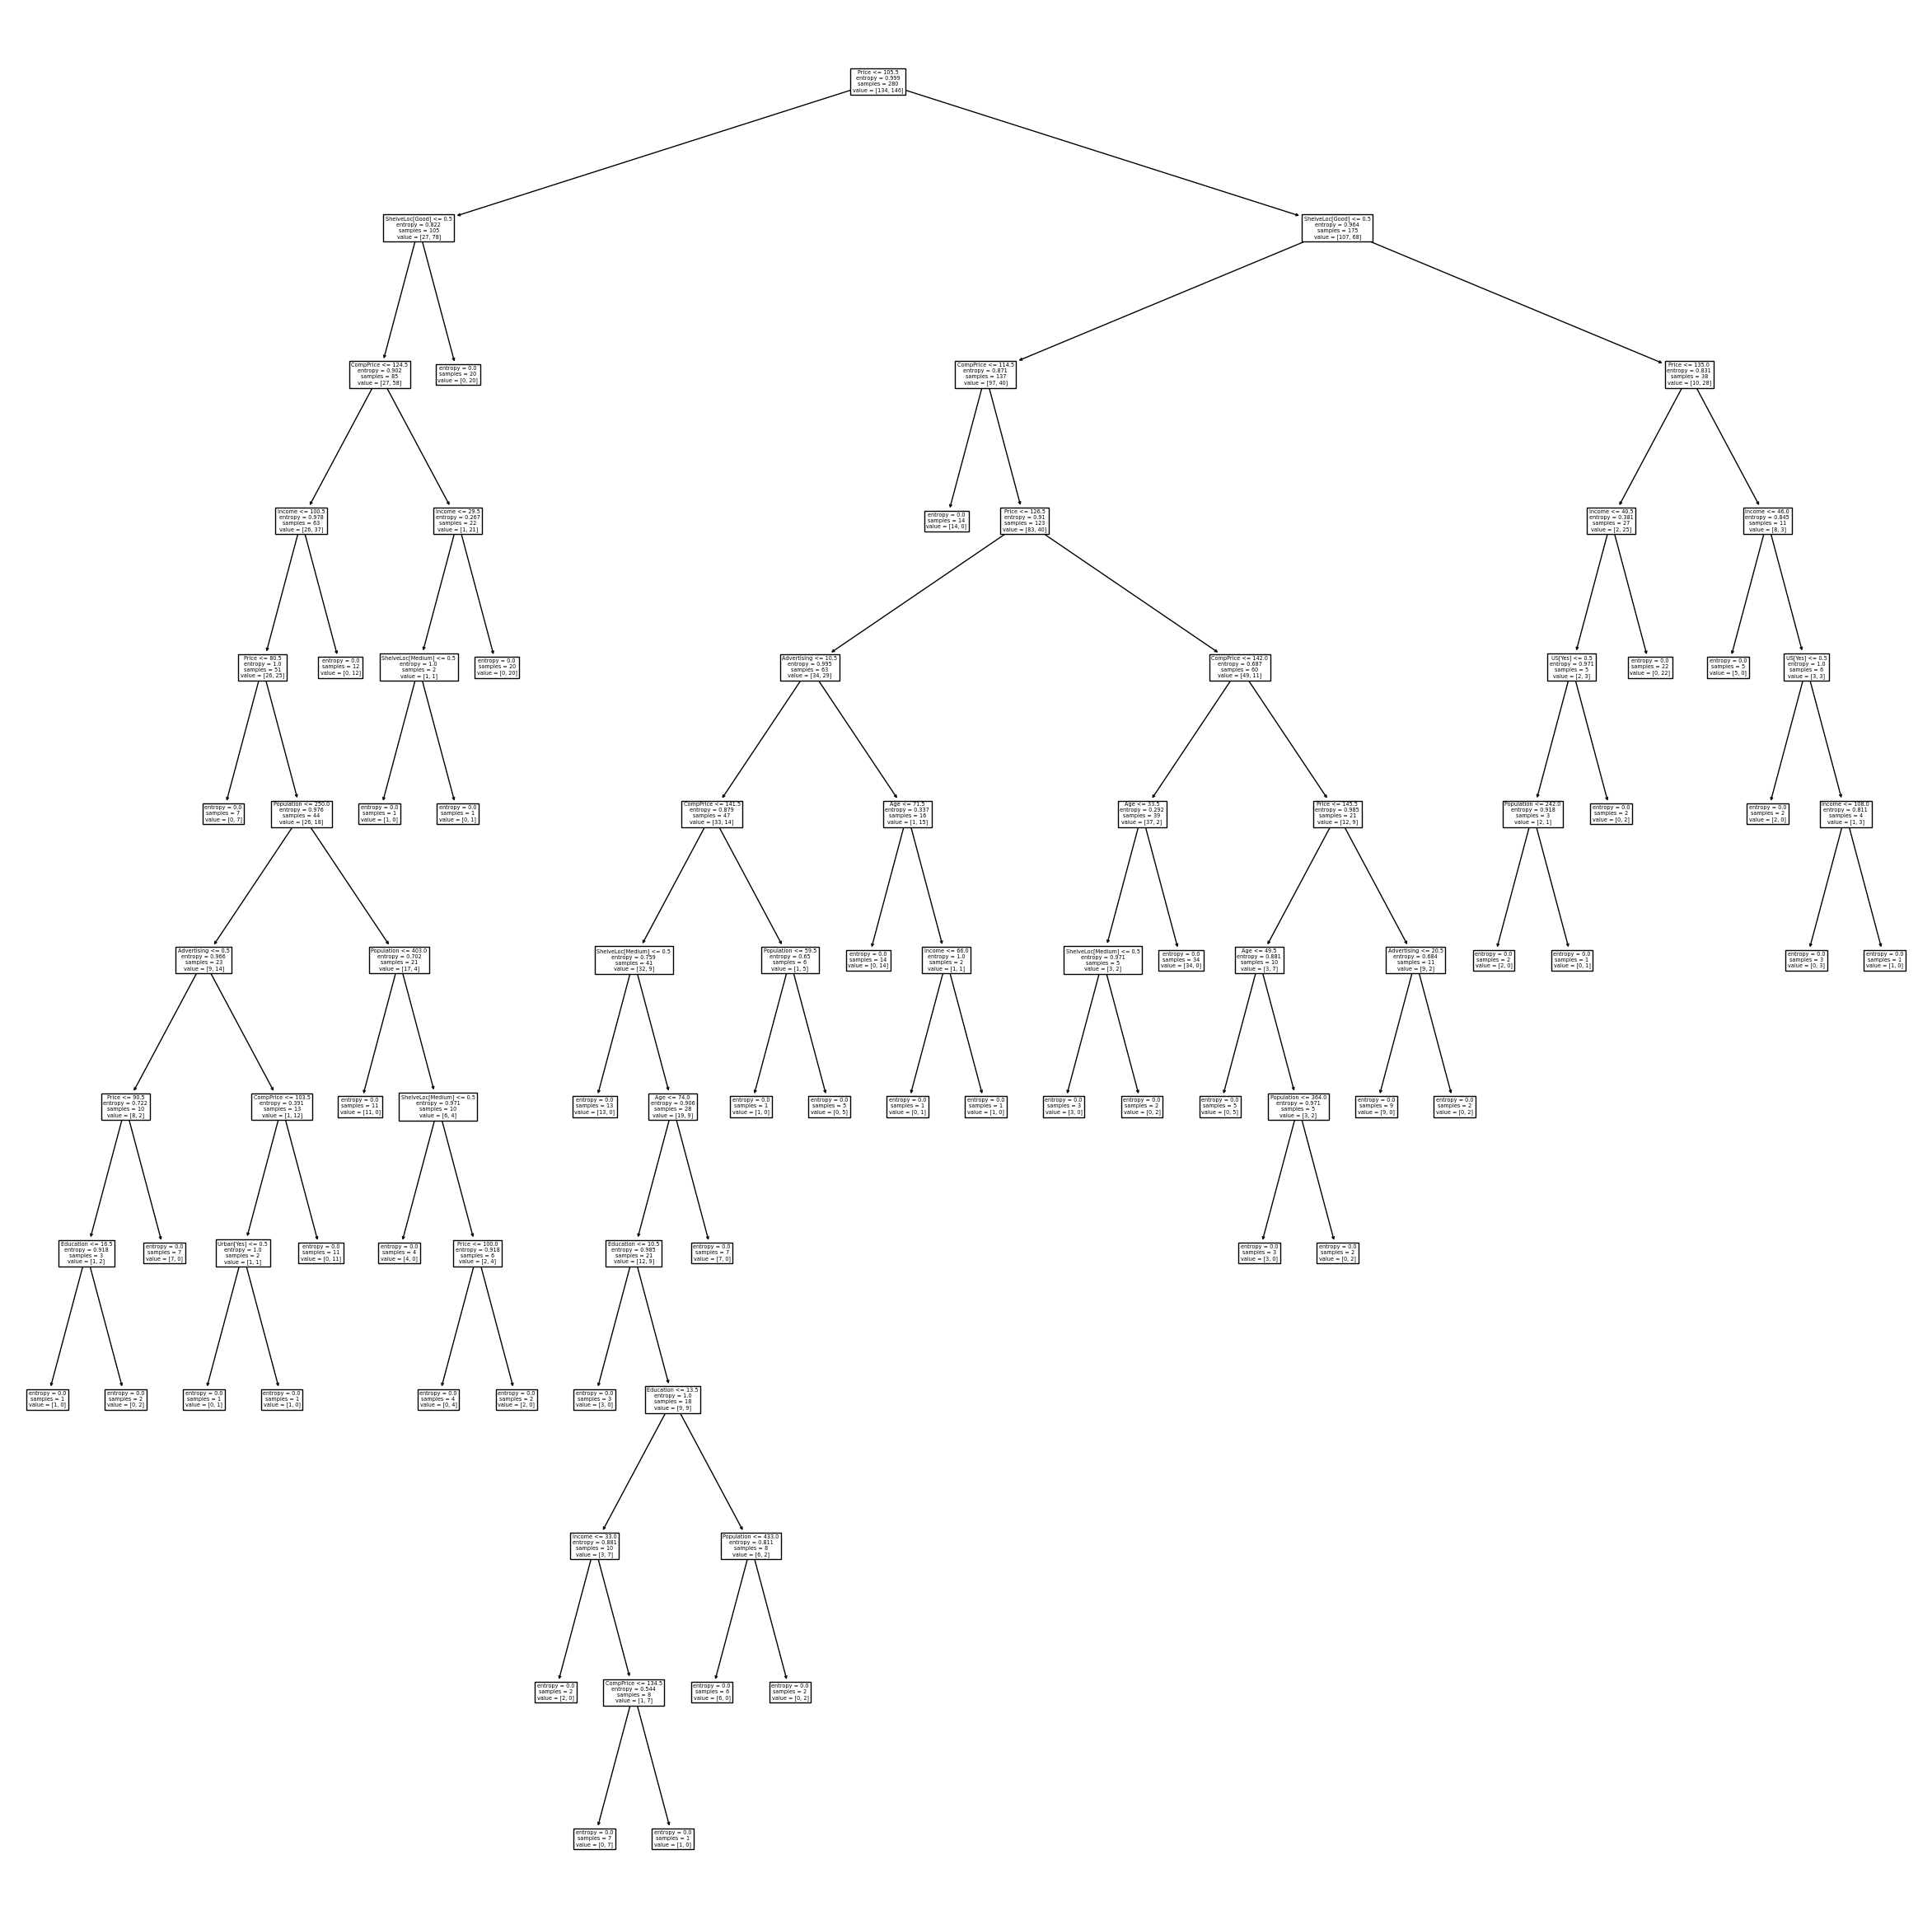

In [ ]:
ax = plt(figsize=(30,30))[1]
plot_tree(model_cdt2, feature_names=feature_names , ax=ax);


In [ ]:
model_cdt2.tree_.n_leaves

46

In [ ]:
#prunning
ccp = model_cdt2.cost_complexity_pruning_path(X_train,y_train) # prunning fn
cv = skm.KFold(5,random_state=14, shuffle=True)
grid = skm.GridSearchCV(model_cdt2, {'ccp_alpha' : ccp.ccp_alphas},
                        refit = True,
                        cv = cv,
                        scoring= 'accuracy')
grid.fit(X_train, y_train)
grid.best_score_# score with traning set

0.7214285714285714

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.009838883936298103, criterion='entropy',
                       random_state=14)

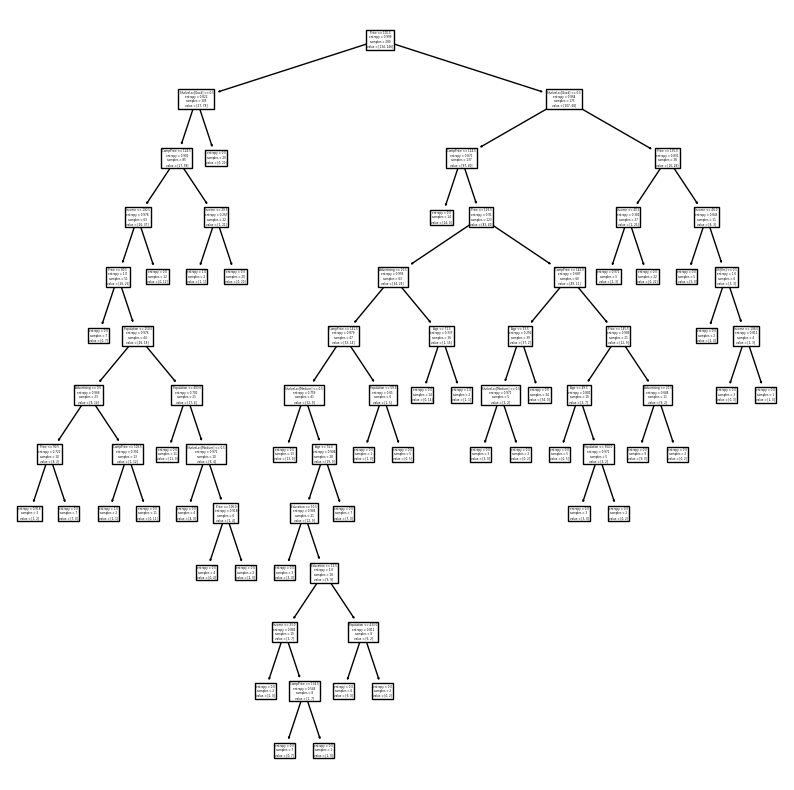

In [ ]:
#visulization # if depth is high this is cost heavy process
ax = plt(figsize=(10,10))[1]
plot_tree(grid.best_estimator_, feature_names=feature_names , ax=ax);

In [ ]:
best_model = grid.best_estimator_
best_model.get_n_leaves()# best model leaves

40

In [ ]:
preds = best_model.predict(X_test)
accuracy_score(y_test,preds) # accuracy on test data

0.8583333333333333

In [ ]:
confusion_table(preds, y_test)

Truth,NO,Yes
Predicted,,
NO,59,8
Yes,9,44


# Decision trees Regression

In [ ]:
boston = load_data('Boston')# load boston dataset
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
model_bos = MS(boston.columns.drop('medv') , intercept=False) # creating model using MS
X = model_bos.fit_transform(boston) # fit the model
feature_names_boston = list(X.columns) # storing feature names into var
X = np.array(X) # creating np array hence dropping header
X_train, X_test , y_train,y_test = skm.train_test_split(X,
                                                        boston['medv'],
                                                        test_size = 0.2, # test size diff from prof
                                                        random_state=14) # splitting the data

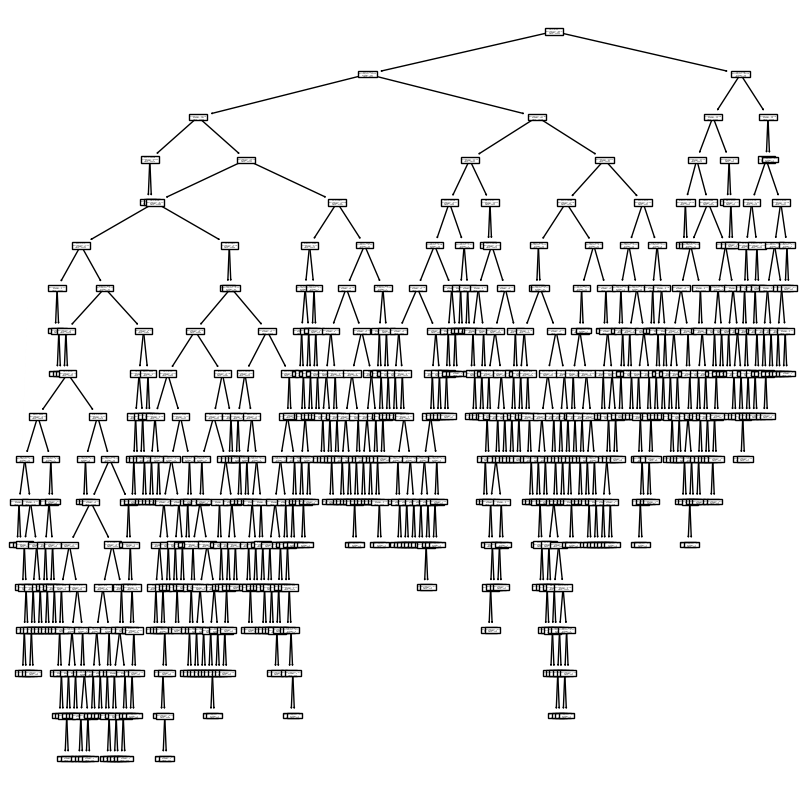

In [ ]:
# Create regressing tree
reg_model = DTR() # plane model
reg_model.fit(X_train,y_train) # train the model

#visulization # if depth is high this is cost heavy process
ax = plt(figsize=(10,10))[1]
plot_tree(reg_model, feature_names=feature_names_boston , ax=ax);

In [ ]:
reg_model.get_n_leaves()

391

In [ ]:
pred3 = reg_model.predict(X_test) # predict the model
mse = (y_test - pred3)**2 # calculate mse
np.mean(mse)

13.778333333333332

In [ ]:
#prunning for reg_model
ccp = reg_model.cost_complexity_pruning_path(X_train,y_train) # prunning fn
cv = skm.KFold(5,random_state=14, shuffle=True)
grid = skm.GridSearchCV(reg_model, {'ccp_alpha' : ccp.ccp_alphas},
                        refit = True,
                        cv = cv,
                        scoring= 'neg_mean_squared_error')
grid.fit(X_train, y_train)
grid.best_score_# score with traning set

-18.225542034822205

In [ ]:
best_model = grid.best_estimator_
pred3 = best_model.predict(X_test) # predict the model
mse = (y_test - pred3)**2 # calculate mse
np.mean(mse)

10.799151091477299

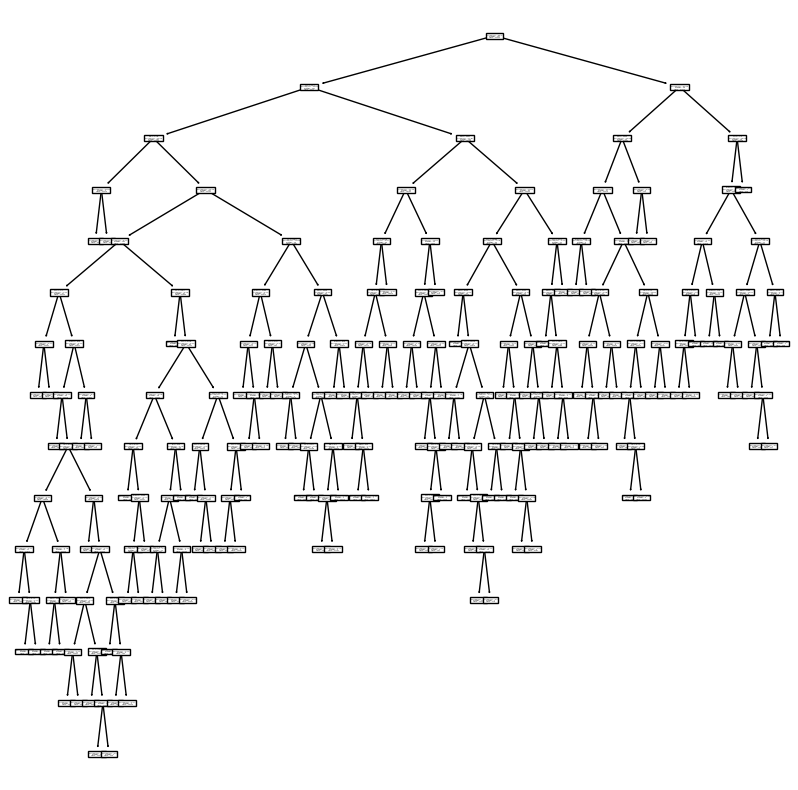

In [ ]:
#visulization # if depth is high this is cost heavy process
ax = plt(figsize=(10,10))[1]
plot_tree(best_model, feature_names=feature_names_boston , ax=ax);

In [ ]:
best_model.get_n_leaves() # leaves reduced to 1/3

117

# Bagging and random forest

In [ ]:
X_train.shape[1]

12

In [ ]:
B = 6
bag_model = RFR(n_estimators=B, # no of estimatiors to pick
                max_features=X_train.shape[1], # all features
                random_state=14) # bagging we can say always select all featues
bag_model.fit(X_train,y_train) # fit
pred4 = bag_model.predict(X_test)# predictions
mse = np.mean((y_test - pred4)**2) # mse
mse

11.271331699346405

In [ ]:
B = 10
rf_model = RFR(n_estimators=B, # no of estimatiors to pick
                max_features=4, # some features # square root of all features is recomended
                random_state=14) # bagging we can say always select all featues
rf_model.fit(X_train,y_train) # fit
pred4 = rf_model.predict(X_test)# predictions
mse = np.mean((y_test - pred4)**2) # mse
mse

13.7831637254902

# Boosting

In [ ]:
boost_model = GBR(n_estimators=5000, # no of diff trees we are adding
                  learning_rate=0.002, # say very low
                  max_depth=3) # depth each time
boost_model.fit(X_train,y_train)
pred5 = boost_model.predict(X_test)
mse = np.mean((y_test - pred5)**2) # mse
mse


7.732617084946112

Ananlysis
(model exact answer submitted witht this file in canvas)

decision tree classifier is best since it has least mean square error

surprisingly random forest classifier has the worst , but since there are no of features less and more we can alter for better accuracy, in that case bagging may be the worst

which model will you select and why?
ans - I will be using decisionTreeClassifier the main reason is it provides flexibility like model build decision tree of max depth and at the same time depth can be adjusted by adding some attributes like max_depth, Additionally if model trends to overfit the data we have the concept of prunning to cover and reach to the best model